# Splitting SSD
This notebook explains how to split the SSD model.

Remembering that a couple of adaptations were performed in the SSD model in order to make the SSD splitting task easy.

## Loading trained model
Unfortunately, there is some problems related to saving model structure so it is more safe to save only its parameters.

In order to load the splited model, we need to create the structures of the two models.

In [1]:
from vision.ssd.vgg_ssd import create_vgg_ssd, create_vgg_ssd_predictor
from vision.ssd.vgg_ssd_new import create_vgg_ssd_new

model_path = "./models/ufpark-model.pth"
split = 0   # Split point int the first maxpooling layer.
label_path = "./models/ufpark-model-labels.txt"

class_names = [name.strip() for name in open(label_path).readlines()]

model = create_vgg_ssd(len(class_names), is_test=True)
model.load(model_path)
model1, model2 = create_vgg_ssd_new(
    len(class_names), model, split=split, is_test=True
)

## Creating predictors

In [2]:
from vision.ssd.predictor import PredictorM1, PredictorM2
from vision.ssd.config import vgg_ssd_config as config
# net, size, mean=0.0, std=1.0, device=None
predictor_m1 = PredictorM1(
        model1,
        config.image_size,
        config.image_mean,
        device=None,
    )
predictor_m2 = PredictorM2(
        model2,
        nms_method=None,
        iou_threshold=config.iou_threshold,
        candidate_size=200,
        device=None,
    )

## Inference test

In [3]:
import cv2

orig_image = cv2.imread('../samurai/dataset/JPEGImages/afternoon_1_scene_0015001.jpg')
image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)
height, width, _ = image.shape
output = predictor_m1.predict(image)
boxes, labels, probs = predictor_m2.predict(output, height, width, 30, 0.4)

In [4]:
for i in range(boxes.size(0)):
    box = boxes[i, :]
    cv2.rectangle(orig_image, (box[0], box[1]), (box[2], box[3]), (255, 255, 0), 4)
    # label = f"""{voc_dataset.class_names[labels[i]]}: {probs[i]:.2f}"""
    label = f"{class_names[labels[i]]}: {probs[i]:.2f}"
    cv2.putText(
        orig_image,
        label,
        (box[0] + 20, box[1] + 40),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,  # font scale
        (255, 0, 255),
        2,
    )  # line type

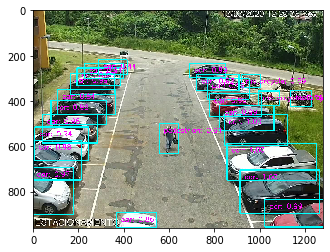

In [5]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(orig_image[:,:,::-1])